# Twitter sentiment analysis using twitter API to extract the tweets

In [1]:
#import libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
plt.style.use('fivethirtyeight')

In [3]:
#create authentication objects
authenticate = tweepy.OAuthHandler(consumerKey,consumerSecret)

#Set the acces token and access Secret
authenticate.set_access_token(accessToken, accessTokenSecret)

#create the API object while passing in the auth information
api = tweepy.API(authenticate)

#Extract 100 tweets from twitter user
posts = api.user_timeline(screen_name = 'BillGates', count = 100, lang = 'en', tweet_mode = 'extended')

#print the last 5 tweets from the account
print('Print the 5 recent tweets: \n')
i=1
for tweet in posts[0:5]:
    print(str(i) + ') ' + tweet.full_text + '\n')
    i = i+1

In [5]:
#create a dataframe
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])

In [6]:
df.head()

,Tweets
0,It only took Senegal 15 years to cut childhood...
1,The French drank an impressive amount of wine ...
2,My favorite author’s new book might be his bes...
3,Our foundation has been working to address thi...
4,Ever heard a toilet be compared to an espresso...


In [7]:
#clean the text
def cleantext(text):
    text = re.sub(r'@[A-Za-z0-9]','',text) #removing @mentions
    text = re.sub(r'#','',text) #removing #
    text = re.sub(r'RT[\s]+','', text) #removing retweets
    text = re.sub(r'https?:\/\/\S+','',text) #remove hyper link
    return text

In [8]:
df['Tweets'] = df['Tweets'].apply(cleantext)

In [9]:
df

,Tweets
0,It only took Senegal 15 years to cut childhood...
1,The French drank an impressive amount of wine ...
2,My favorite author’s new book might be his bes...
3,Our foundation has been working to address thi...
4,Ever heard a toilet be compared to an espresso...
...,...
95,U_H2020 IB reakthrough loomBiorenewa1 To get t...
96,We're fortunate to have an Energy Secretary wh...
97,Recent extreme weather events are a stark remi...
98,Thanks welkernbc and CCAtlanta for a great con...


In [10]:
#Create a function to get subjectivity
def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get polarity
def get_polarity(text):
    return TextBlob(text).sentiment.polarity


In [11]:
#create new columns
df['Subjectivity'] = df['Tweets'].apply(get_subjectivity)

df['Polarity'] = df['Tweets'].apply(get_polarity)

In [12]:
df

,Tweets,Subjectivity,Polarity
0,It only took Senegal 15 years to cut childhood...,0.602778,0.230556
1,The French drank an impressive amount of wine ...,0.383333,0.183333
2,My favorite author’s new book might be his bes...,0.584848,0.545455
3,Our foundation has been working to address thi...,0.633333,0.288889
4,Ever heard a toilet be compared to an espresso...,0.100000,0.011111
...,...,...,...
95,U_H2020 IB reakthrough loomBiorenewa1 To get t...,0.525000,0.175000
96,We're fortunate to have an Energy Secretary wh...,0.700000,0.377778
97,Recent extreme weather events are a stark remi...,0.493750,-0.081250
98,Thanks welkernbc and CCAtlanta for a great con...,0.475000,0.500000


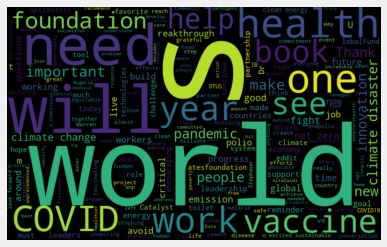

In [13]:
#plot wordcloud
allwords = ' '.join(tweets for tweets in df['Tweets'])
wordcloud = WordCloud(height = 500, width = 800 ).generate(allwords)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [14]:
#Create a funtion to compute the positive,neutral and negative analysis
def getAnalysis(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

In [15]:
df['Analysis'] = df['Polarity'].apply(getAnalysis)

In [16]:
df

,Tweets,Subjectivity,Polarity,Analysis
0,It only took Senegal 15 years to cut childhood...,0.602778,0.230556,Positive
1,The French drank an impressive amount of wine ...,0.383333,0.183333,Positive
2,My favorite author’s new book might be his bes...,0.584848,0.545455,Positive
3,Our foundation has been working to address thi...,0.633333,0.288889,Positive
4,Ever heard a toilet be compared to an espresso...,0.100000,0.011111,Positive
...,...,...,...,...
95,U_H2020 IB reakthrough loomBiorenewa1 To get t...,0.525000,0.175000,Positive
96,We're fortunate to have an Energy Secretary wh...,0.700000,0.377778,Positive
97,Recent extreme weather events are a stark remi...,0.493750,-0.081250,Negative
98,Thanks welkernbc and CCAtlanta for a great con...,0.475000,0.500000,Positive


In [17]:
df['Analysis'].value_counts()

Positive    73
Neutral     19
Negative     8
Name: Analysis, dtype: int64

In [20]:
#print positive tweets
j=1
sortedDf = df.sort_values(by = ['Polarity'])
for i in range(0,sortedDf.shape[0]):
    if (sortedDf['Analysis'][i]=='Positive'):
        print(str(j) + ') '+ sortedDf['Tweets'][i])
        print()
        j = j+1

1) It only took Senegal 15 years to cut childhood death in half. Community health workers and successful vaccination campaigns played a key role in this success. Read more from xemplarshealth and see how lessons from Senegal can be applied elsewhere. 

2) The French drank an impressive amount of wine in 1926, but their consumption is now a third of what it was back then. Why? I love how this book forces you to think about the story behind a seemingly niche statistic. 

3) My favorite author’s new book might be his best one yet. Each chapter covers one of 71 facts about the world that help you understand how history ties together. I unabashedly recommend it to anyone who loves learning. 

4) Our foundation has been working to address this massive problem for 10 years—here’s one of the incredible Reinvent the Toilet designs that could help:  

5) Ever heard a toilet be compared to an espresso machine? That’s how Dr. Shannon Yee describes the toilet he and his team have developed. 

6) Ho

In [22]:
#print negative tweets
j=1
sortedDf =df.sort_values(by = ['Polarity'], ascending = 'False')
for i in range(0,sortedDf.shape[0]):
    if (sortedDf['Analysis'][i]=='Negative'):
        print(str(j) + ') '+ sortedDf['Tweets'][i])
        print()
        j = j+1

1) Over the years, I’ve shared a stage with a jar of human feces, smelled pit latrine odor, and drunk water made from poop (and convinced immyfallon to drink it too). Was it worth it? You bet. Here’s why: 

2) Communities of color have been hit hard by COVID-19. One of the reasons why parts of the medical system often fail Black and brown people is because it’s not designed with them in mind. Dr. Stephaun Wallace wants to change that. 

3) Dr. Stephaun Wallace (mstephaunelite) has spent the last year helping make COVID-19 vaccines work for everybody. Stephaun and his colleagues at redHutch are working to reach the people who are usually left behind. 

4) It’s deeply unfair that the people who contribute the least to climate change will suffer the worst from its effects:  

5) NICEF: Over the past few weeks health workers in Ethiopia 🇪🇹, Nigeria 🇳🇬, Sudan 🇸🇩 and the Philippines 🇵🇭 were vaccinated against COVI…

6) For decades, Australian researcher Ruth Bishop led global efforts to iden

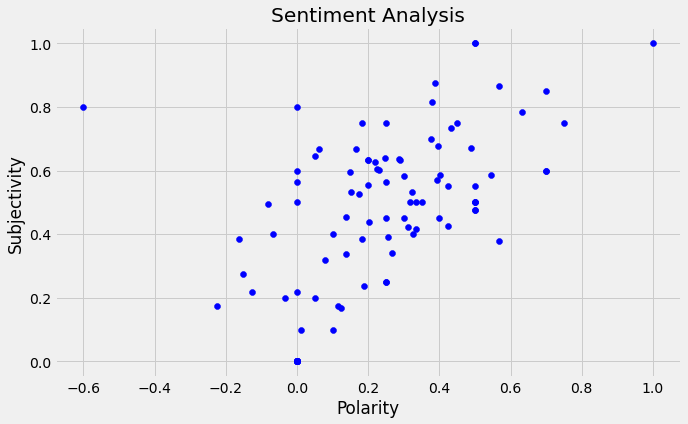

In [25]:
#plot the subjectivity and polarity

plt.figure(figsize=(10,6))
for i in range(0,df.shape[0]):
    plt.scatter(df['Polarity'][i],df['Subjectivity'][i], color = 'Blue')
    
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

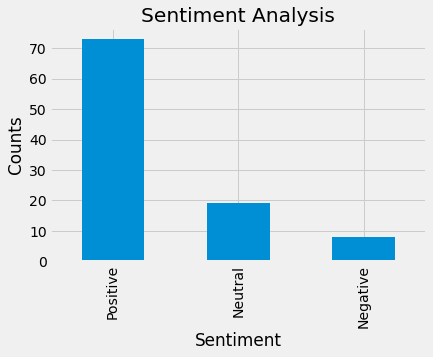

In [26]:
#Show the value counts
df['Analysis'].value_counts()
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()

